In [4]:
# notebooks/01_eda_and_preprocessing.ipynb

# --- 1. Importations Initiales ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurez les options d'affichage de Pandas pour voir toutes les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully.")


Libraries imported successfully.


In [30]:


# Construire le chemin complet vers le fichier CSV
DATA_FILE_NAME = 'Telco-Customer-Churn.csv'
data_path = r"C:\Users\pc\Documents\churn_prediction_system\data\WA_Fn-UseC_-Telco-Customer-Churn.csv"

# --- 2. Chargement du Dataset ---
try:
    # Lecture du fichier
    df = pd.read_csv(data_path)
    
    print("✅ Dataset chargé avec succès.")
    print(f"Chemin du fichier : **{data_path}**")
    print(f"Dimensions du dataset : {df.shape}")
    print("\n5 premières lignes du dataset :")
    print(df.head())
    
except FileNotFoundError:
    print("❌ Erreur: 'Telco-Customer-Churn.csv' non trouvé.")
    print(f"Le chemin vérifié était: {data_path}")
    print("Veuillez vous assurer que le fichier est bien placé dans le dossier **data/**.")

✅ Dataset chargé avec succès.
Chemin du fichier : **C:\Users\pc\Documents\churn_prediction_system\data\WA_Fn-UseC_-Telco-Customer-Churn.csv**
Dimensions du dataset : (7043, 21)

5 premières lignes du dataset :
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One y

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [33]:


print("\nUnique values and counts for Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n--- Column: {col} ---")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")



Unique values and counts for Categorical Columns:

--- Column: customerID ---
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Number of unique values: 7043

--- Column: gender ---
gender
Male      3555
Female    3488
Name: count, dtype: int64
Number of unique values: 2

--- Column: Partner ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Number of unique values: 2

--- Column: Dependents ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Number of unique values: 2

--- Column: PhoneService ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Number of unique values: 2

--- Column: MultipleLines ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Number of unique values: 3

--- Column: InternetService --

In [34]:


# --- 4. Identification des Problèmes : Valeurs Manquantes ---
print("\nMissing values before specific handling:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing values before specific handling:
Series([], dtype: int64)


In [35]:

# Problème connu avec 'TotalCharges' : contient des espaces vides qui ne sont pas reconnus comme NaN
print("\nChecking 'TotalCharges' for non-numeric values (spaces):")
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]['TotalCharges'])


Checking 'TotalCharges' for non-numeric values (spaces):
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [36]:

# Convertir 'TotalCharges' en numérique, en remplaçant les erreurs par NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Vérifier à nouveau les valeurs manquantes après conversion
print("\nMissing values after 'TotalCharges' conversion:")
print(df.isnull().sum()[df.isnull().sum() > 0])



Missing values after 'TotalCharges' conversion:
TotalCharges    11
dtype: int64


In [37]:
# --- 5. Gestion des Valeurs Manquantes (stratégie initiale pour EDA) ---
# Pour le MVP, nous allons simplement supprimer les lignes avec des NaN dans 'TotalCharges'.
# Pour un cas réel, une imputation plus sophistiquée pourrait être envisagée (moyenne, médiane, régression).
df.dropna(inplace=True)
print(f"\nDataset shape after dropping rows with NaN in 'TotalCharges': {df.shape}")

# --- 6. Conversion de la Variable Cible ---
# Convertir 'Churn' de 'Yes'/'No' à 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("\n'Churn' column after conversion:")
print(df['Churn'].value_counts())


Dataset shape after dropping rows with NaN in 'TotalCharges': (7032, 21)

'Churn' column after conversion:
Churn
0    5163
1    1869
Name: count, dtype: int64


In [38]:
# --- 7. Suppression des Colonnes Non Pertinentes ---
# Supprimer 'customerID' car c'est un identifiant unique et non une feature prédictive
df.drop('customerID', axis=1, inplace=True)
print(f"\nDataset shape after dropping 'customerID': {df.shape}")
print("\nFirst 5 rows after initial cleaning:")
print(df.head())



Dataset shape after dropping 'customerID': (7032, 20)

First 5 rows after initial cleaning:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85         29.85      0
1    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.50      0
2    Male              0      No         No       2          Yes

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [40]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


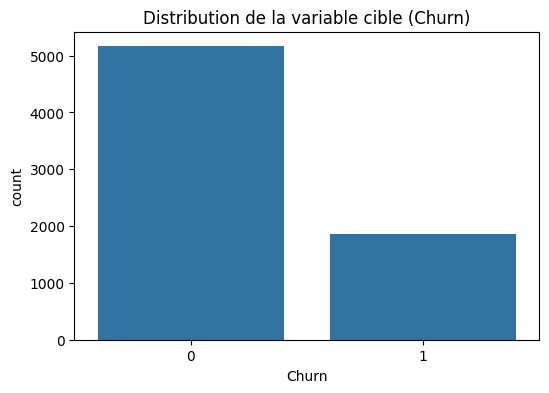


Churn Rate:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64
We observe a class imbalance: 73.42% Non-Churn vs 26.58% Churn.


In [41]:
# --- 8. Analyse du Déséquilibre de Classe ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution de la variable cible (Churn)')
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"\nChurn Rate:\n{churn_rate}")
print(f"We observe a class imbalance: {churn_rate[0]:.2f}% Non-Churn vs {churn_rate[1]:.2f}% Churn.")


In [ ]:

# --- 9. Visualisation des Relations entre Features et Churn ---
# Pour quelques exemples de variables catégorielles
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclure 'TotalCharges' si elle est encore considérée comme object par erreur
if 'TotalCharges' in categorical_cols:
    categorical_cols.remove('TotalCharges')

# Limiter le nombre de graphiques pour le notebook
if len(categorical_cols) > 10: # Ajustez ce nombre si vous avez beaucoup de catégories
    print(f"\nVisualizing only first 10 categorical columns due to large number ({len(categorical_cols)} found).")
    categorical_cols = categorical_cols[:10]

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Pour quelques exemples de variables numériques
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis')
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()

print("\nEDA completed. Insights gained for preprocessing strategy.")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [44]:
# Sélection des colonnes catégorielles
# 'object' capture la plupart des variables qualitatives
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Ajoutez 'SeniorCitizen' qui est bien une catégorie binaire (0 ou 1)
categorical_cols.append('SeniorCitizen') 

# Exclure 'customerID' si elle n'a pas été supprimée au chargement
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID') 

print(f"Variables Qualitatives à analyser : {categorical_cols}")

Variables Qualitatives à analyser : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [45]:
for col in categorical_cols:
    print(f"\n--- Analyse de la colonne : **{col}** ---")
    
    # Fréquences Absolues (Nombre d'occurrences)
    absolute_counts = df[col].value_counts()
    print("\nCompte des valeurs (Absolu) :")
    print(absolute_counts)
    
    # Fréquences Relatives (Proportions / Pourcentages)
    relative_counts = df[col].value_counts(normalize=True).mul(100).round(2)
    print("\nFréquences relatives (Pourcentage) :")
    print(relative_counts)
    
    print("-" * 30)


--- Analyse de la colonne : **gender** ---

Compte des valeurs (Absolu) :
gender
Male      3549
Female    3483
Name: count, dtype: int64

Fréquences relatives (Pourcentage) :
gender
Male      50.47
Female    49.53
Name: proportion, dtype: float64
------------------------------

--- Analyse de la colonne : **Partner** ---

Compte des valeurs (Absolu) :
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Fréquences relatives (Pourcentage) :
Partner
No     51.75
Yes    48.25
Name: proportion, dtype: float64
------------------------------

--- Analyse de la colonne : **Dependents** ---

Compte des valeurs (Absolu) :
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Fréquences relatives (Pourcentage) :
Dependents
No     70.15
Yes    29.85
Name: proportion, dtype: float64
------------------------------

--- Analyse de la colonne : **PhoneService** ---

Compte des valeurs (Absolu) :
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Fréquences relatives (Pourc

In [46]:
# Sélectionne uniquement les colonnes numériques et calcule les statistiques
quantitative_stats = df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T
print("--- Statistiques Descriptives des Variables Quantitatives ---")
print(quantitative_stats)

--- Statistiques Descriptives des Variables Quantitatives ---
                 count         mean          std    min       25%       50%        75%      max
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000    55.0000    72.00
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350    89.8625   118.75
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475  3794.7375  8684.80


In [47]:
# Calcul de l'asymétrie pour chaque colonne
print("\n--- Analyse de l'Asymétrie (Skewness) ---")
skewness = df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()
print(skewness)


--- Analyse de l'Asymétrie (Skewness) ---
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64


In [48]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0
